### Problem Statement and Project Overview

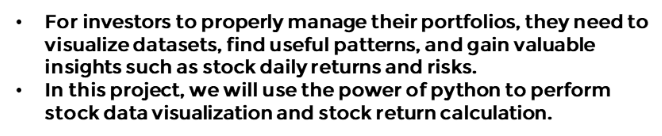

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [3]:
# Read the stock data csv file
# use Pandas to read the file
stock_df = pd.read_csv('/content/drive/MyDrive/PYTHON SEMUA/MASTER PYTHON for FINANCE (udemy 2 dec 2024)/Colab Notebooks/UDEMY Python for Financial analysis/stock.csv')

In [4]:
# AAPL = Apple
# BA = Boeing
# T = AT&T
# MGM = MGM Resort International (Hotel Industry)
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google
# sp500 = US Stock Market

In [5]:
stock_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [6]:
# Sort the stock data by date
stock_df = stock_df.sort_values('Date')
stock_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [7]:
stock_df.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [8]:
# Print out the number of stocks
print('Total Number of stocks :{}'.format(len(stock_df.columns[1:])))

Total Number of stocks :9


In [10]:
# Average return of stock
stock_df[stock_df.columns[1:]].mean()

,0
AAPL,140.819823
BA,189.942700
T,35.162899
MGM,23.105743
AMZN,915.665665
IBM,161.853001
TSLA,259.600815
GOOG,783.712512
sp500,2218.749554


In [11]:
# standard deviation
stock_df[stock_df.columns[1:]].std()

,0
AAPL,70.827601
BA,103.678586
T,3.207490
MGM,6.963847
AMZN,697.838905
IBM,25.561938
TSLA,210.988003
GOOG,334.448057
sp500,537.321727


In [13]:
# All stocks description
stock_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902
